<a href="https://colab.research.google.com/github/AEYSHA-AZAM/DataZenixProject2/blob/main/Customer_Segmentation_Project_Aeysha_Azam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
# Step 1: Dataset banana
import pandas as pd
import numpy as np

np.random.seed(42)  # Repeatable results

# 1000 customers ka data
n_customers = 1000

# Dataset fields
data = {
    'CustomerID': np.arange(1, n_customers + 1),
    'Gender': np.random.choice(['Male', 'Female'], n_customers),
    'Age': np.random.randint(18, 70, n_customers),
    'AnnualIncome': np.random.normal(60000, 15000, n_customers).astype(int),
    'SpendingScore': np.random.randint(1, 101, n_customers),
    'PurchaseFrequency': np.random.poisson(12, n_customers),
    'TotalPurchaseAmount': np.random.normal(1000, 300, n_customers).clip(min=50).astype(int),
    'LastPurchaseDaysAgo': np.random.randint(1, 365, n_customers)
}

df = pd.DataFrame(data)
df.head()


,CustomerID,Gender,Age,AnnualIncome,SpendingScore,PurchaseFrequency,TotalPurchaseAmount,LastPurchaseDaysAgo
0,1,Male,34,50808,57,11,759,287
1,2,Female,26,54184,100,7,976,85
2,3,Male,50,64287,33,9,1298,182
3,4,Male,37,65016,24,25,1158,315
4,5,Male,30,69878,39,12,860,297


In [45]:
# Step 2: Data ki safai aur analysis
print("Missing values:\n", df.isnull().sum())
print("\nData Types:\n", df.dtypes)
print("\nSummary Statistics:\n", df.describe())


Missing values:
 CustomerID             0
Gender                 0
Age                    0
AnnualIncome           0
SpendingScore          0
PurchaseFrequency      0
TotalPurchaseAmount    0
LastPurchaseDaysAgo    0
dtype: int64

Data Types:
 CustomerID              int64
Gender                 object
Age                     int64
AnnualIncome            int64
SpendingScore           int64
PurchaseFrequency       int64
TotalPurchaseAmount     int64
LastPurchaseDaysAgo     int64
dtype: object

Summary Statistics:
         CustomerID          Age   AnnualIncome  SpendingScore  \
count  1000.000000  1000.000000    1000.000000    1000.000000   
mean    500.500000    43.799000   61193.272000      50.726000   
std     288.819436    15.133857   14881.865727      28.634784   
min       1.000000    18.000000   16179.000000       1.000000   
25%     250.750000    31.000000   50953.250000      26.000000   
50%     500.500000    44.000000   61135.500000      51.000000   
75%     750.250000    57.

In [46]:
# Step 3: Kuch important metrics
print("Average Purchase Amount:", df["TotalPurchaseAmount"].mean())
print("Average Purchase Frequency:", df["PurchaseFrequency"].mean())
print("Average Spending Score:", df["SpendingScore"].mean())


Average Purchase Amount: 990.319
Average Purchase Frequency: 11.836
Average Spending Score: 50.726


In [47]:
# ✅ STEP 4: Customer Segmentation using K-Means
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select features for clustering
features = df[['AnnualIncome', 'SpendingScore', 'PurchaseFrequency', 'TotalPurchaseAmount', 'LastPurchaseDaysAgo']]

# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# KMeans Clustering - UPDATED for scikit-learn >= 1.4
kmeans = KMeans(n_clusters=4, n_init=10, random_state=42)  # make sure n_init is explicitly set
df['Cluster'] = kmeans.fit_predict(scaled_features)

# View cluster labels
df['Cluster'].value_counts()


,count
Cluster,
2,272
0,258
1,246
3,224


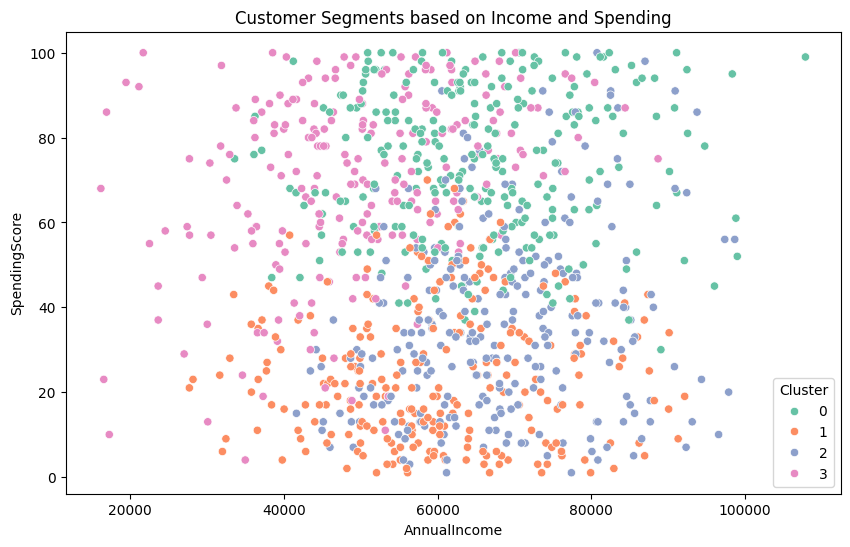

In [48]:
# Step 5: Cluster visualization
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='AnnualIncome', y='SpendingScore', hue='Cluster', palette='Set2')
plt.title("Customer Segments based on Income and Spending")
plt.show()


In [49]:
# STEP 6: Segment Analysis
cluster_summary = df.groupby('Cluster').mean(numeric_only=True)
print(cluster_summary)


         CustomerID        Age  AnnualIncome  SpendingScore  \
Cluster                                                       
0        525.313953  44.139535  65521.209302      74.050388   
1        505.650407  44.252033  59715.910569      24.341463   
2        468.819853  44.794118  68252.466912      36.492647   
3        504.732143  41.700893  49258.995536      70.120536   

         PurchaseFrequency  TotalPurchaseAmount  LastPurchaseDaysAgo  
Cluster                                                               
0                11.488372          1092.124031            95.581395  
1                13.016260           856.117886           111.398374  
2                11.441176          1115.488971           273.250000  
3                11.419643           868.450893           250.910714  
